<a href="https://colab.research.google.com/github/ta1231/ML_Practice/blob/main/BostonHousing_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
from google.colab import drive
BostonHousingData = pd.read_csv('/content/BostonHousingData.csv')
features=BostonHousingData.iloc[:, 0:13]

In [ ]:
flist=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [ ]:
stats.pearsonr(features['NOX'], features['INDUS']) 

(0.7636514469209154, 7.913361061236894e-98)

In [ ]:
def corr_c(dataframe):
    col_length=len(dataframe.columns)
    idx_length=len(dataframe.index)
    for idx in range(idx_length):
        for col in range(col_length):
            dataframe.iloc[idx,col] = stats.pearsonr(features[flist[idx]], features[flist[col]])[0]
    return dataframe

In [ ]:
def corr_p(dataframe):
    col_length=len(dataframe.columns)
    idx_length=len(dataframe.index)
    for col in range(col_length):
        for idx in range(idx_length):
            dataframe.iloc[idx,col] = stats.pearsonr(features[flist[idx]], features[flist[col]])[1]
    return dataframe

In [ ]:
corr_coefficient=pd.DataFrame(np.zeros((13,13)))
corr_coefficient.columns = flist
corr_coefficient.index = flist

correlation

In [ ]:
corr_c(corr_coefficient)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [ ]:
corr_p_values=pd.DataFrame(np.zeros((13,13)))
corr_p_values.columns = flist
corr_p_values.index = flist

In [ ]:
corr_p(corr_p_values)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,0.000000e+00,5.506472e-06,1.450349e-21,0.209435,3.751739e-23,6.346703e-07,2.854869e-16,8.519949e-19,2.693844e-56,2.357127e-47,2.942922e-11,2.487274e-19,2.654277e-27
ZN,5.506472e-06,0.000000e+00,1.289161e-38,0.337810,7.231578e-36,6.935337e-13,7.575575e-45,9.748287e-66,6.988109e-13,4.385492e-13,5.325074e-20,7.207719e-05,2.908736e-22
INDUS,1.450349e-21,1.289161e-38,0.000000e+00,0.157463,7.913361e-98,5.328458e-20,8.409642e-61,3.586280e-78,8.368289e-50,3.018199e-82,3.774843e-19,1.184586e-16,1.381948e-51
CHAS,2.094345e-01,3.378103e-01,1.574628e-01,0.000000,4.029050e-02,4.018410e-02,5.177446e-02,2.568848e-02,8.686789e-01,4.244225e-01,6.203916e-03,2.733379e-01,2.258990e-01
NOX,3.751739e-23,7.231578e-36,7.913361e-98,0.040291,0.000000e+00,3.818694e-12,7.452392e-86,4.233063e-100,3.342034e-53,1.093287e-66,1.885692e-05,7.816936e-19,5.979284e-49
RM,6.346703e-07,6.935337e-13,5.328458e-20,0.040184,3.818694e-12,0.000000e+00,4.459649e-08,3.237746e-06,1.918446e-06,2.086816e-11,1.610820e-16,3.906695e-03,1.033009e-53
AGE,2.854869e-16,7.575575e-45,8.409642e-61,0.051774,7.452392e-86,4.459649e-08,0.000000e+00,9.857534e-92,2.360876e-27,2.551067e-34,2.338885e-09,3.911801e-10,2.783924e-51
DIS,8.519949e-19,9.748287e-66,3.586280e-78,0.025688,4.233063e-100,3.237746e-06,9.857534e-92,0.000000e+00,1.418269e-32,1.025931e-38,1.229920e-07,2.278649e-11,6.356331e-33
RAD,2.693844e-56,6.988109e-13,8.368289e-50,0.868679,3.342034e-53,1.918446e-06,2.360876e-27,1.418269e-32,0.000000e+00,4.129920e-195,1.778554e-28,6.592918e-26,9.904457e-32
TAX,2.357127e-47,4.385492e-13,3.018199e-82,0.424423,1.093287e-66,2.086816e-11,2.551067e-34,1.025931e-38,4.129920e-195,0.000000e+00,5.686833e-28,1.367562e-25,2.583867e-40


In [ ]:
description = pd.DataFrame(np.zeros((8, 13)))
description = BostonHousingData.describe()

In [ ]:
description

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


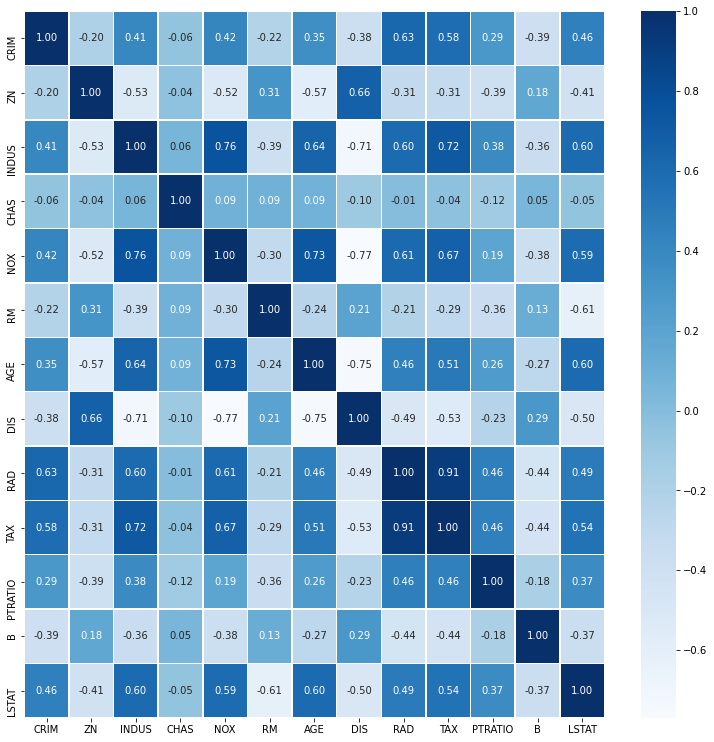

In [ ]:
#correlation coefficient heatmap
plt.figure(figsize=(13,13))
sns.heatmap(corr_coefficient, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

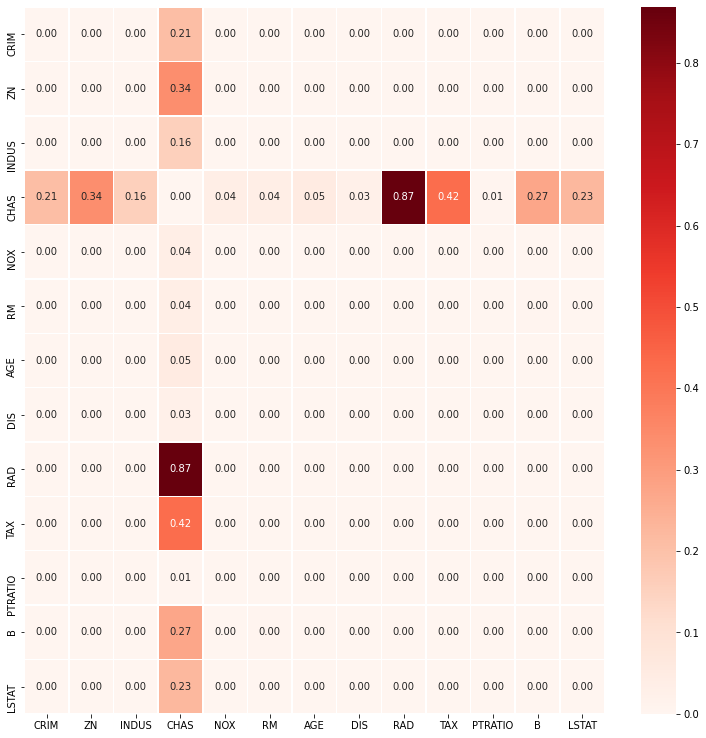

In [ ]:
#correlation P-values heatmap
plt.figure(figsize=(13,13))
sns.heatmap(corr_p_values, annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')


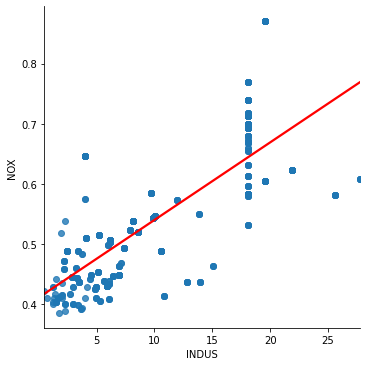

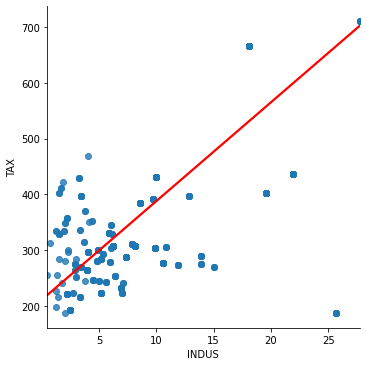

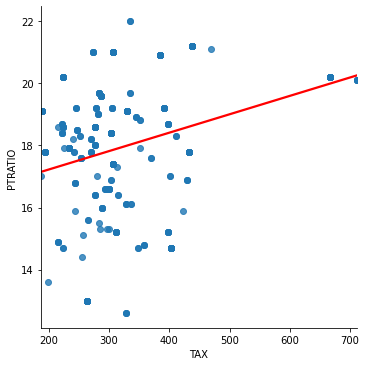

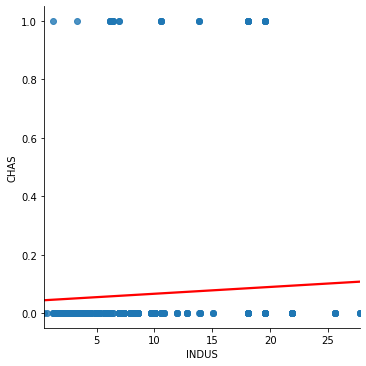

In [ ]:
#Scatterplots for specific variables
sns.lmplot(x = "INDUS", y = "NOX", data = BostonHousingData, line_kws={'color':"red"}, ci=None)
sns.lmplot(x = "INDUS", y = "TAX", data = BostonHousingData, line_kws={'color':"red"}, ci=None)
sns.lmplot(x = "TAX", y = "PTRATIO", data = BostonHousingData, line_kws={'color':"red"}, ci=None)
sns.lmplot(x = "INDUS", y = "CHAS", data = BostonHousingData, line_kws={'color':"red"}, ci=None)
